## Logistic Regression

Logistic regression differs from linear regression by using the sigmoid activation function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
This "S"-shaped function maps values to the range $(0, 1)$, making it ideal for predicting probabilities and handling overlapping data.

## Cross Entropy Loss Function

For binary classification, we use the Binary Cross Entropy Loss to measure the difference between predicted probabilities and true labels:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y^{(i)}\log \hat{y}^{(i)} + (1-y^{(i)}) \log (1 - \hat{y}^{(i)}) \Big]
$$
This loss function helps optimize the model by maximizing the probability of correct classifications.


In [148]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))



import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [149]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:50], banknote_df.iloc[762:812]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['variance', 'entropy']].values

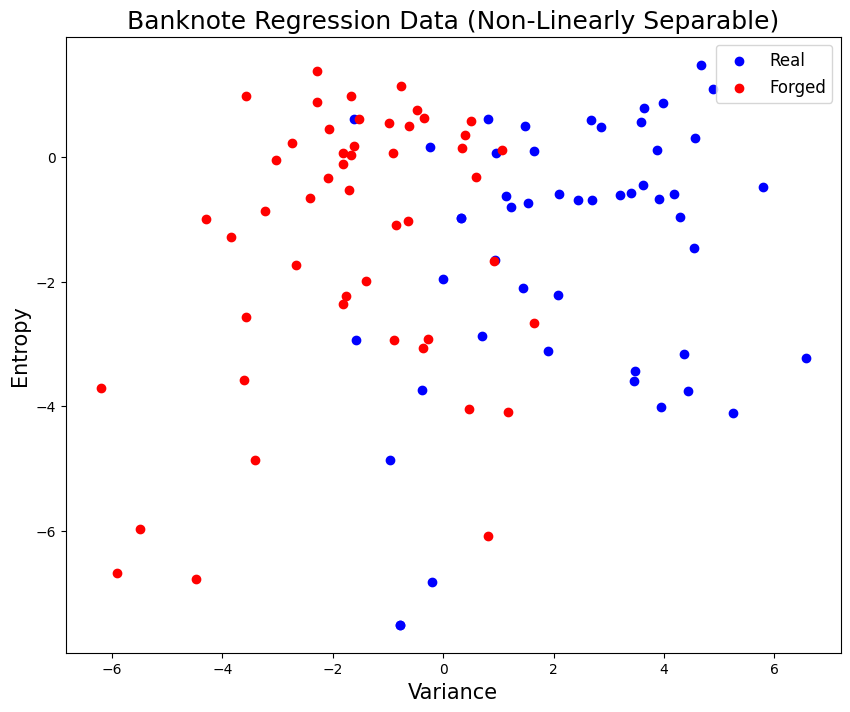

In [150]:
plt.figure(figsize=(10, 8))
plt.title("Banknote Regression Data (Non-Linearly Separable)", fontsize=18)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Real')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Forged')
plt.xlabel("Variance", fontsize=15)
plt.ylabel("Entropy", fontsize=15)
plt.legend(fontsize=12)
plt.show()

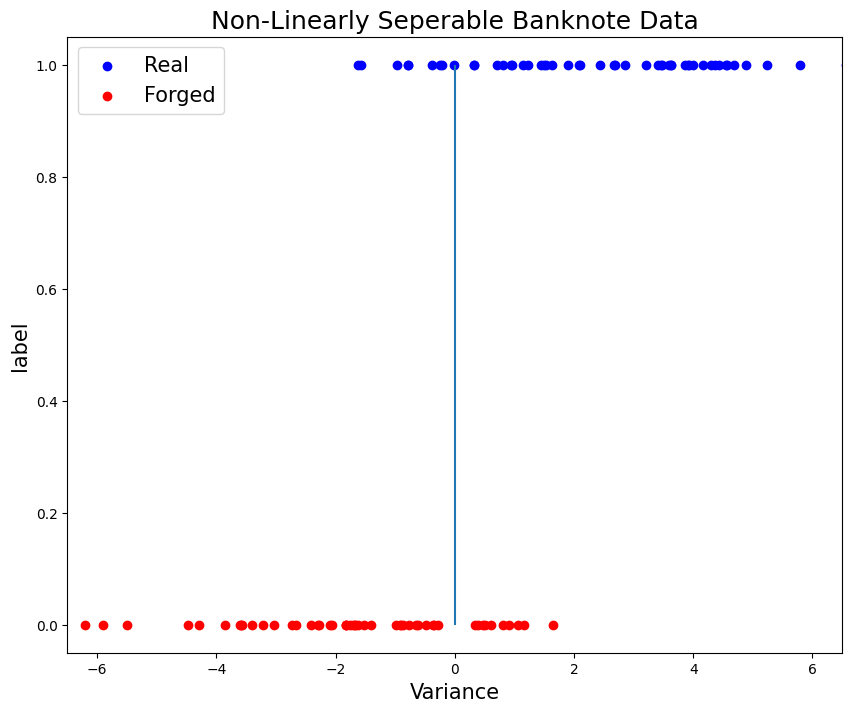

In [151]:
plt.figure(figsize = (10, 8))
plt.xlim((-6.5, 6.5))
plt.scatter(X[y == 0, 0], np.ones(50), c='blue', label='Real')
plt.scatter(X[y == 1, 0], np.zeros(50), c='red', label='Forged')
plt.vlines(0.0, 0.0, 1.0)
plt.xlabel("Variance", fontsize=15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Banknote Data", fontsize = 18)
plt.show()

In [152]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [153]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [154]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)




node = SingleNeuron(sigmoid, cross_entropy_loss)

X = D.variance.values
X = X.reshape(-1, 1)

# y = D['class'].to_numpy()
# X = D[['variance', 'entropy']].values

node.train(X, y, alpha = 0.001, epochs = 100)

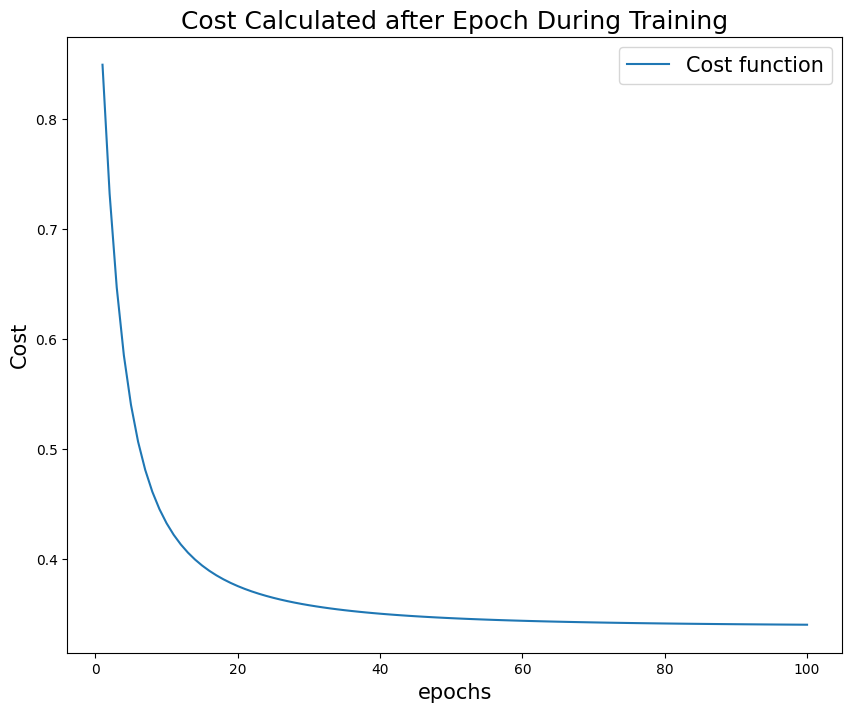

In [155]:
node.plot_cost_function()
plt.show()

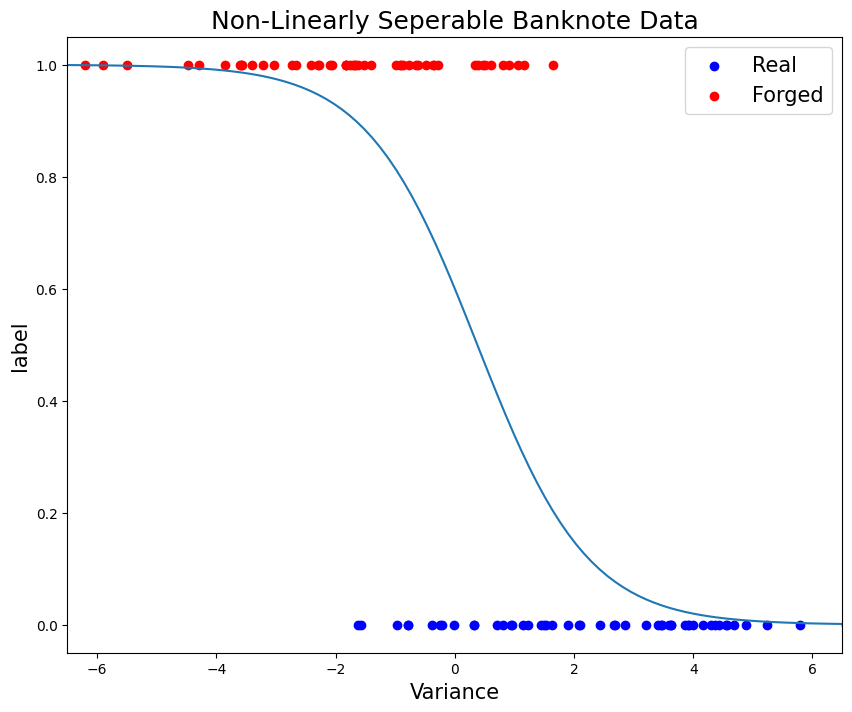

In [156]:
plt.figure(figsize = (10, 8))
plt.xlim((-6.5, 6.5))
plt.scatter(X[y == 0, 0], np.zeros(50), c='blue', label='Real')
plt.scatter(X[y == 1, 0], np.ones(50), c='red', label='Forged')
plt.xlabel("Variance", fontsize=15)
plt.ylabel("label", fontsize = 15)

domain = np.linspace(-6.5,6.5,100)

plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.legend(fontsize = 15, loc = "upper right")
plt.title("Non-Linearly Seperable Banknote Data", fontsize = 18)
plt.show()

In [157]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.2


## Binary Classification With Multiple Inputs

We can now move into 2D, considering both Variance and Entropy of the Banknote images in order to divide the two groups in a way that maximizes the probability that they are correctly classified.

In [158]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

X_two = D[['variance', 'entropy']].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.001, epochs = 100)

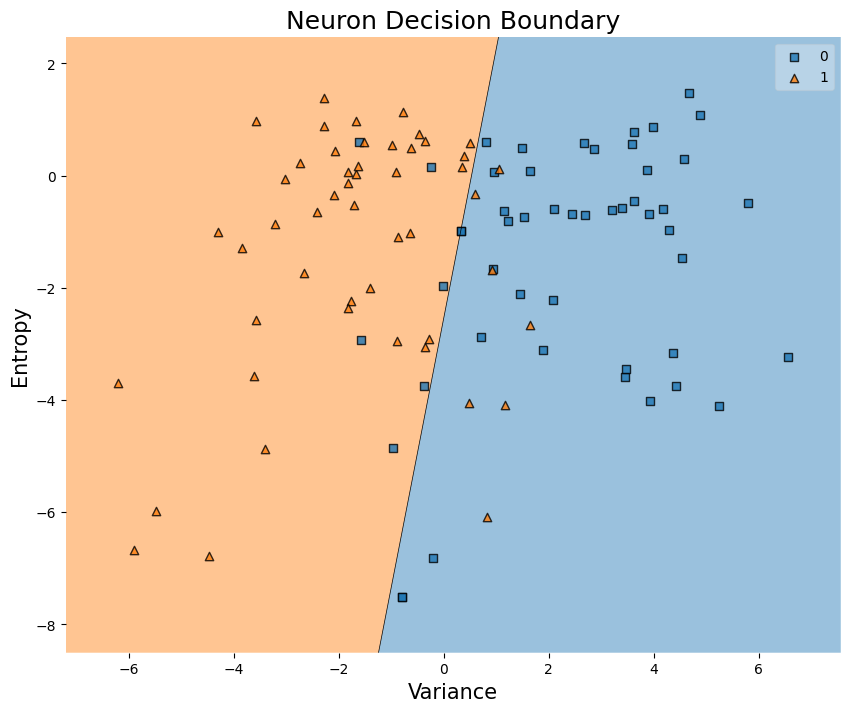

In [159]:
node_two.plot_decision_boundary(X_two, y,"Variance","Entropy")